In [1]:
from pyiron import Project

In [2]:
pr = Project('.')
pr.remove_jobs(recursive=True)

# Interactive development 

In [3]:
pr = Project('bulk_md')  # simulation project 

In [4]:
# atomistic structure 
structure = pr.create_ase_bulk('Al')
structure.plot3d()

_ColormakerRegistry()

NGLWidget()

In [5]:
job = pr.create_job(pr.job_type.Lammps, 'job_md')  # calculation type 

In [6]:
job.structure = structure  # set structure for calculation 

In [7]:
job.list_potentials()
job.potential = 'Al_Mg_Mendelev_eam'  # define the interaction potential 

/srv/conda/envs/notebook/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


The job job_md_ev was saved and received the ID: 1
The job strain_0_9 was saved and received the ID: 2
The job strain_0_92 was saved and received the ID: 3
The job strain_0_94 was saved and received the ID: 4
The job strain_0_96 was saved and received the ID: 5
The job strain_0_98 was saved and received the ID: 6
The job strain_1_0 was saved and received the ID: 7
The job strain_1_02 was saved and received the ID: 8
The job strain_1_04 was saved and received the ID: 9
The job strain_1_06 was saved and received the ID: 10
The job strain_1_08 was saved and received the ID: 11
The job strain_1_1 was saved and received the ID: 12
job_id:  2 finished
job_id:  3 finished
job_id:  4 finished
job_id:  5 finished
job_id:  6 finished
job_id:  7 finished
job_id:  8 finished
job_id:  9 finished
job_id:  10 finished
job_id:  11 finished
job_id:  12 finished


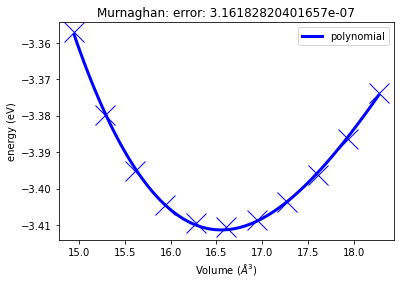

In [8]:
# calculate energy at different volumes
ev_curve_job = job.create_job(
    job_type=pr.job_type.Murnaghan, 
    job_name=job.job_name + '_ev'
) 
ev_curve_job.run()  # execute calculation 
ev_curve_job.plot()  # plot result 

In [9]:
ev_curve_job['output/equilibrium_bulk_modulus']  # calculated bulk modulus in GPa 

89.01548731441547

# Define a function 

In [10]:
def calc_bulk_modulus(job):
    ev_curve_job = job.create_job(pr.job_type.Murnaghan, job.job_name + '_ev')
    ev_curve_job.run()
    return ev_curve_job['output/equilibrium_bulk_modulus']

## Apply the function to the same interatomic potential 
The results are reloaded from the database. 

In [11]:
pr = Project('bulk_md')
job = pr.create_job(pr.job_type.Lammps, 'job_md')
job.structure = structure
job.potential = 'Al_Mg_Mendelev_eam'
calc_bulk_modulus(job)

2020-05-18 16:44:32,728 - pyiron_log - WARNING - The job job_md_ev is being loaded instead of running. To re-run use the argument 'run_again=True'


89.01548731441547

## Repeat the same calculation on the DFT scale 
In contrast to the interatomic scale the DFT scale considers the electron density, while the interatomic scale just considers the atoms. 

In [12]:
pr = Project('bulk_dft')
job = pr.create_job(pr.job_type.Sphinx, 'job_dft')
job.structure = structure
# job.potential = 'Al_Mg_Mendelev_eam'  # no interatomic potential required 
calc_bulk_modulus(job)

The job job_dft_ev was saved and received the ID: 13
The job strain_0_9 was saved and received the ID: 14
The job strain_0_92 was saved and received the ID: 15
The job strain_0_94 was saved and received the ID: 16
The job strain_0_96 was saved and received the ID: 17
The job strain_0_98 was saved and received the ID: 18
The job strain_1_0 was saved and received the ID: 19
The job strain_1_02 was saved and received the ID: 20
The job strain_1_04 was saved and received the ID: 21
The job strain_1_06 was saved and received the ID: 22
The job strain_1_08 was saved and received the ID: 23
The job strain_1_1 was saved and received the ID: 24
job_id:  14 finished
job_id:  15 finished
job_id:  16 finished
job_id:  17 finished
job_id:  18 finished
job_id:  19 finished
job_id:  20 finished
job_id:  21 finished
job_id:  22 finished
job_id:  23 finished
job_id:  24 finished


82.24204301173144